# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [48]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Z-score for outlier detection
from scipy.stats import zscore

# Compute distances
from scipy.spatial.distance import cdist

# Perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform PCA and GMM
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
# Load marketing dataset into a pandas dataframe, check file presence and provide useful output
import os

file_path = "/content/drive/MyDrive/marketing_campaign.csv"
if os.path.exists(file_path):
    data = pd.read_csv(file_path, sep="\t")
    print("Dataset loaded.")
else:
    print("File not found:", file_path)

Dataset loaded.


## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [50]:
data.shape

(2240, 29)

In [51]:
# Checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [52]:
pd.concat([data.head(), data.iloc[-10:]])

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
1      2174        1954  Graduation         Single   46344.0        1   
2      4141        1965  Graduation       Together   71613.0        0   
3      6182        1984  Graduation       Together   26646.0        1   
4      5324        1981         PhD        Married   58293.0        1   
2230   7004        1984  Graduation         Single   11012.0        1   
2231   9817        1970      Master         Single   44802.0        0   
2232   8080        1986  Graduation         Single   26816.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   
2234   8372        1974  Graduation        Married   34421.0        1   
2235  10870        1967  Graduation        Married   61223.0        0   
2236   4001        1946         PhD       Together   64014.0        2   
2237   7270        1981  Graduation       Divorced   56981.0        0   
2238   8235        1956      Master       Together   69245.0        0   
2239   9405        1954         PhD        Married   52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
2230         0  16-03-2013       82        24          3               26   
2231         0  21-08-2012       71       853         10              143   
2232         0  17-08-2012       50         5          1                6   
2233         0  02-06-2013       23         9         14               18   
2234         0  01-07-2013       81         3          3                7   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
2230                7                 1            23                  3   
2231               13                10            20                  2   
2232                3                 4             3                  1   
2233                8                 1            12                  4   
2234                6                 2             9                  1   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   


In [54]:
# Create a new 'Age' feature to replace 'Year_Birth' (which is less usable for segmentation purposes)
from datetime import date
current_year = date.today().year
data['Age'] = current_year - data['Year_Birth']

# Calculate the average age
print("Mean Age is:", data['Age'].mean())

# Calculate the median age
print("Median Age is:", data['Age'].median())

Mean Age is: 56.19419642857143
Median Age is: 55.0


##### **Observations:** The dataset has 2,240 entries and 29 columns. It contains 24 integer columns, 1 float column, and 4 object columns. The mean age is around 56 years.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [55]:
# Copying the data to another variable to avoid any changes to original data
data = data.copy()

In [56]:
# Check the statistical summary of the data
data.describe(include = 'all').T

count unique         top  freq          mean  \
ID                   2240.0    NaN         NaN   NaN   5592.159821   
Year_Birth           2240.0    NaN         NaN   NaN   1968.805804   
Education              2240      5  Graduation  1127           NaN   
Marital_Status         2240      8     Married   864           NaN   
Income               2216.0    NaN         NaN   NaN  52247.251354   
Kidhome              2240.0    NaN         NaN   NaN      0.444196   
Teenhome             2240.0    NaN         NaN   NaN       0.50625   
Dt_Customer            2240    663  31-08-2012    12           NaN   
Recency              2240.0    NaN         NaN   NaN     49.109375   
MntWines             2240.0    NaN         NaN   NaN    303.935714   
MntFruits            2240.0    NaN         NaN   NaN     26.302232   
MntMeatProducts      2240.0    NaN         NaN   NaN        166.95   
MntFishProducts      2240.0    NaN         NaN   NaN     37.525446   
MntSweetProducts     2240.0    NaN         NaN   NaN     27.062946   
MntGoldProds         2240.0    NaN         NaN   NaN     44.021875   
NumDealsPurchases    2240.0    NaN         NaN   NaN         2.325   
NumWebPurchases      2240.0    NaN         NaN   NaN      4.084821   
NumCatalogPurchases  2240.0    NaN         NaN   NaN      2.662054   
NumStorePurchases    2240.0    NaN         NaN   NaN      5.790179   
NumWebVisitsMonth    2240.0    NaN         NaN   NaN      5.316518   
AcceptedCmp3         2240.0    NaN         NaN   NaN      0.072768   
AcceptedCmp4         2240.0    NaN         NaN   NaN      0.074554   
AcceptedCmp5         2240.0    NaN         NaN   NaN      0.072768   
AcceptedCmp1         2240.0    NaN         NaN   NaN      0.064286   
AcceptedCmp2         2240.0    NaN         NaN   NaN      0.013393   
Complain             2240.0    NaN         NaN   NaN      0.009375   
Z_CostContact        2240.0    NaN         NaN   NaN           3.0   
Z_Revenue            2240.0    NaN         NaN   NaN          11.0   
Response             2240.0    NaN         NaN   NaN      0.149107   
Age                  2240.0    NaN         NaN   NaN     56.194196   

                              std     min      25%      50%      75%       max  
ID                    3246.662198     0.0  2828.25   5458.5  8427.75   11191.0  
Year_Birth              11.984069  1893.0   1959.0   1970.0   1977.0    1996.0  
Education                     NaN     NaN      NaN      NaN      NaN       NaN  
Marital_Status                NaN     NaN      NaN      NaN      NaN       NaN  
Income               25173.076661  1730.0  35303.0  51381.5  68522.0  666666.0  
Kidhome                  0.538398     0.0      0.0      0.0      1.0       2.0  
Teenhome                 0.544538     0.0      0.0      0.0      1.0       2.0  
Dt_Customer                   NaN     NaN      NaN      NaN      NaN       NaN  
Recency                 28.962453     0.0     24.0     49.0     74.0      99.0  
MntWines               336.597393     0.0    23.75    173.5   504.25    1493.0  
MntFruits               39.773434     0.0      1.0      8.0     33.0     199.0  
MntMeatProducts        225.715373     0.0     16.0     67.0    232.0    1725.0  
MntFishProducts         54.628979     0.0      3.0     12.0     50.0     259.0  
MntSweetProducts        41.280498     0.0      1.0      8.0     33.0     263.0  
MntGoldProds            52.167439     0.0      9.0     24.0     56.0     362.0  
NumDealsPurchases        1.932238     0.0      1.0      2.0      3.0      15.0  
NumWebPurchases          2.778714     0.0      2.0      4.0      6.0      27.0  
NumCatalogPurchases      2.923101     0.0      0.0      2.0      4.0      28.0  
NumStorePurchases        3.250958     0.0      3.0      5.0      8.0      13.0  
NumWebVisitsMonth        2.426645     0.0      3.0      6.0      7.0      20.0  
AcceptedCmp3             0.259813     0.0      0.0      0.0      0.0       1.0  
AcceptedCmp4             0.262728     0.0      0.0      0.0      0.0 

##### **Observations:** The average household income is 52247.25, as shown in the statistical summary.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [57]:
# Check for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [58]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer to fill missing 'Income' values with the median
# Using median is usually preferred for income since it is less sensitive to outliers
income_imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer only on the 'Income' column
data['Income'] = income_imputer.fit_transform(data[['Income']])

##### **Observations:** Yes, there are 24 missing values in the `Income` column. I treated them using median imputation, because the income distribution is skewed and the median is more robust to outliers.

#### **Question 4**: Are there any duplicates in the data?

In [59]:
# Check for duplicate values
data.duplicated().sum()

np.int64(0)

##### **Observations:** There are no duplicates in the data. Therefore, there is no need to drop them using: data.drop_duplicates(inplace=True).

In [60]:
# Drop columns containing unique IDs, repetitive campaign information,
# and other metadata that are not informative for clustering analysis
columns_to_drop = [col for col in [
    'Dt_Customer', 'Year_Birth', 'ID',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Education',
    'Marital_Status', 'Z_CostContact', 'Z_Revenue',] if col in data.columns]
data.drop(columns=columns_to_drop, inplace=True)

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [61]:
data.shape

(2240, 18)

The dataset has 2240 rows and 18 columns.

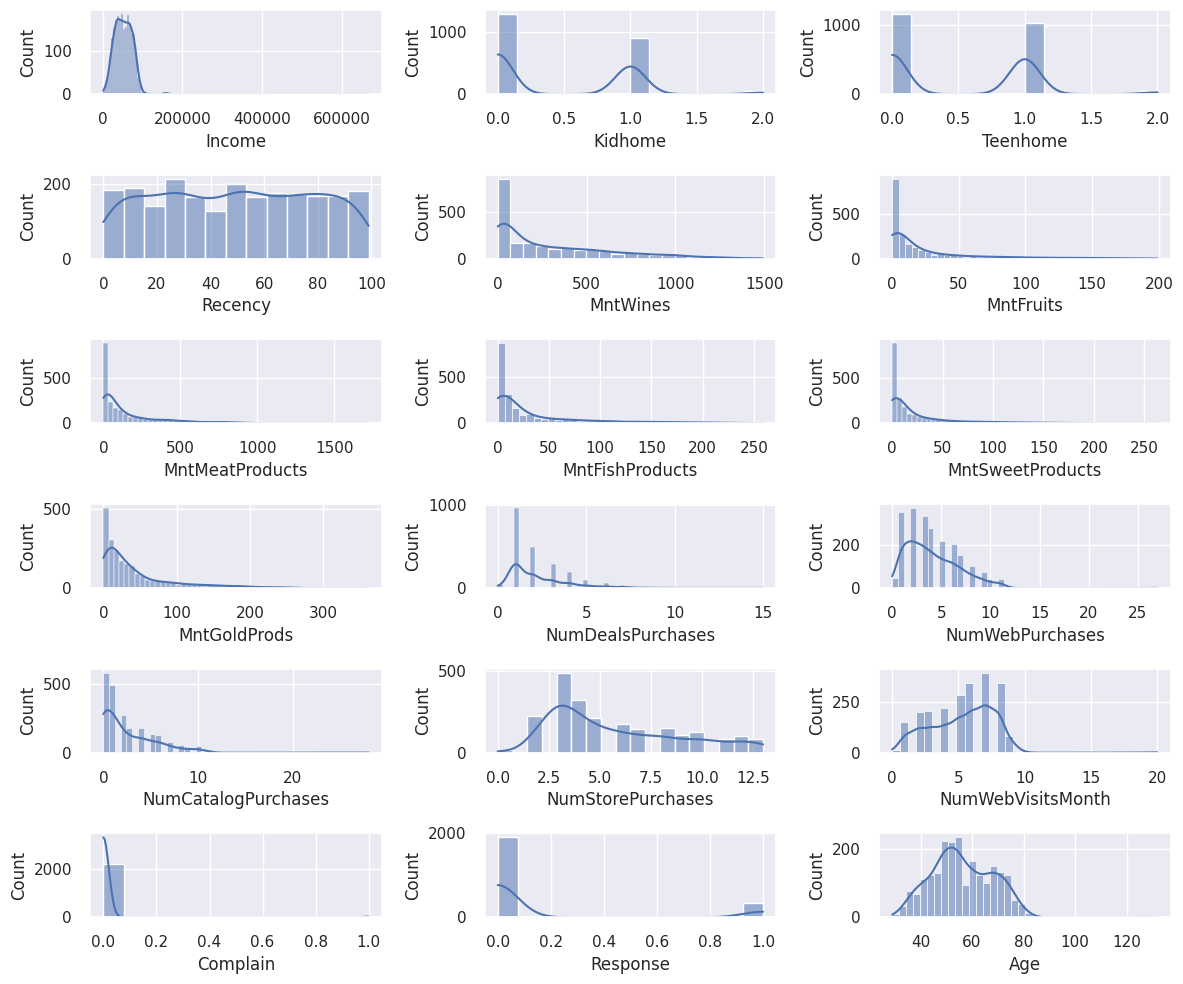

In [62]:
# Defining the figure size
plt.figure(figsize=(12, 10))

# Iterating through each column
# Assigning a subplot in the main plot
# Plotting the histogram
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(6, 3, i+1)
    sns.histplot(data=data, x=feature, kde = True)

# Add spacing between plots
plt.tight_layout();

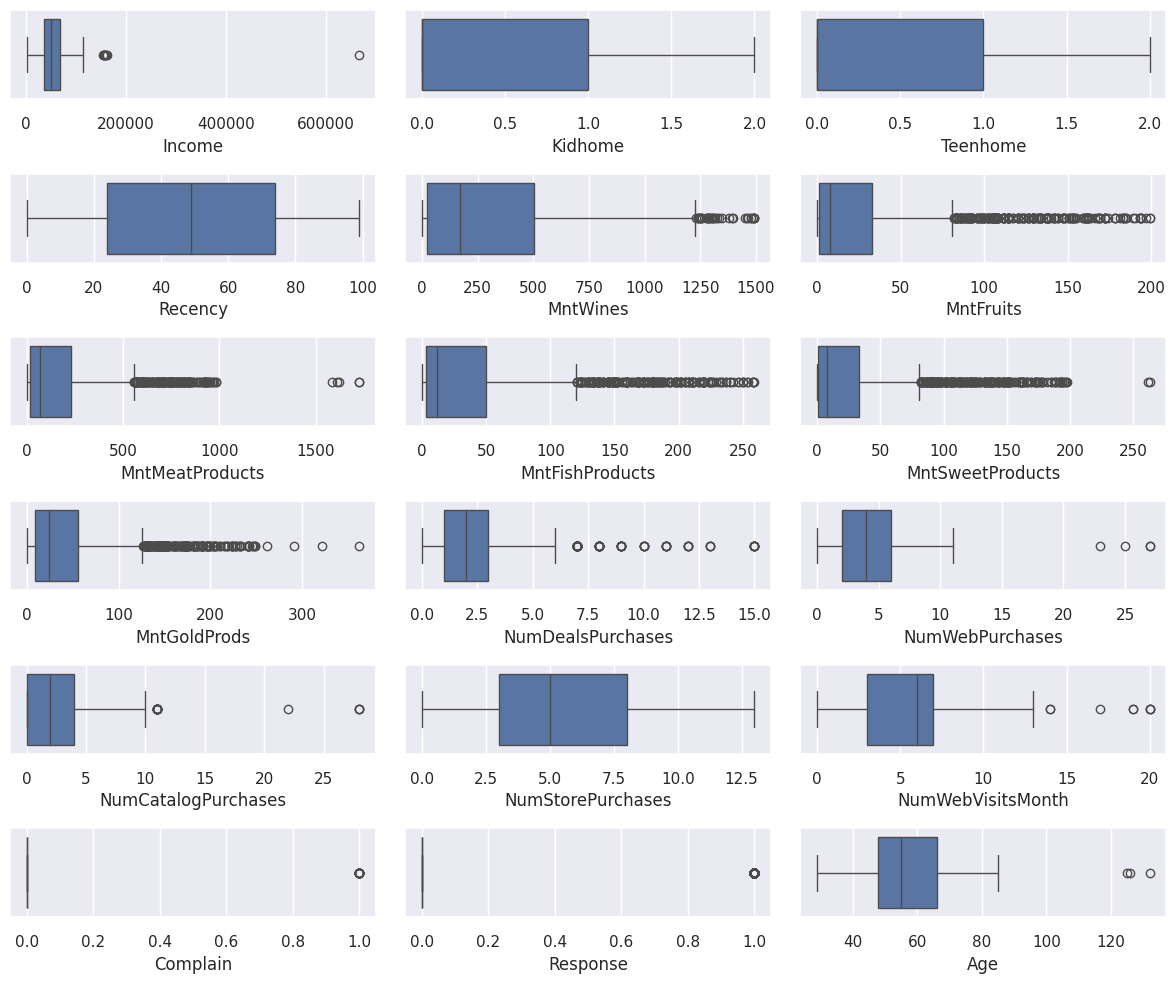

In [63]:
# Defining the figure size
plt.figure(figsize=(12, 10))

# Plotting the boxplot for each numerical feature
# Iterating through each column (see: previous cell)
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(6, 3, i+1)
    sns.boxplot(data=data, x=feature)

plt.tight_layout();

##### **Observations:** Most of the numeric variables, including `Income`, `MntWines`, `MntMeatProducts`, and `NumCatalogPurchases`, are right-skewed: they indicate that a small number of customers have very high values. This is confirmed by the presence of many outliers in the boxplots. Age is normally distributed, but has some very high-end outliers (perhaps too high? The values are above 100). These distributions suggest the need for scaling and support my decision to not remove the outliers, which I will motivate more fully later.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

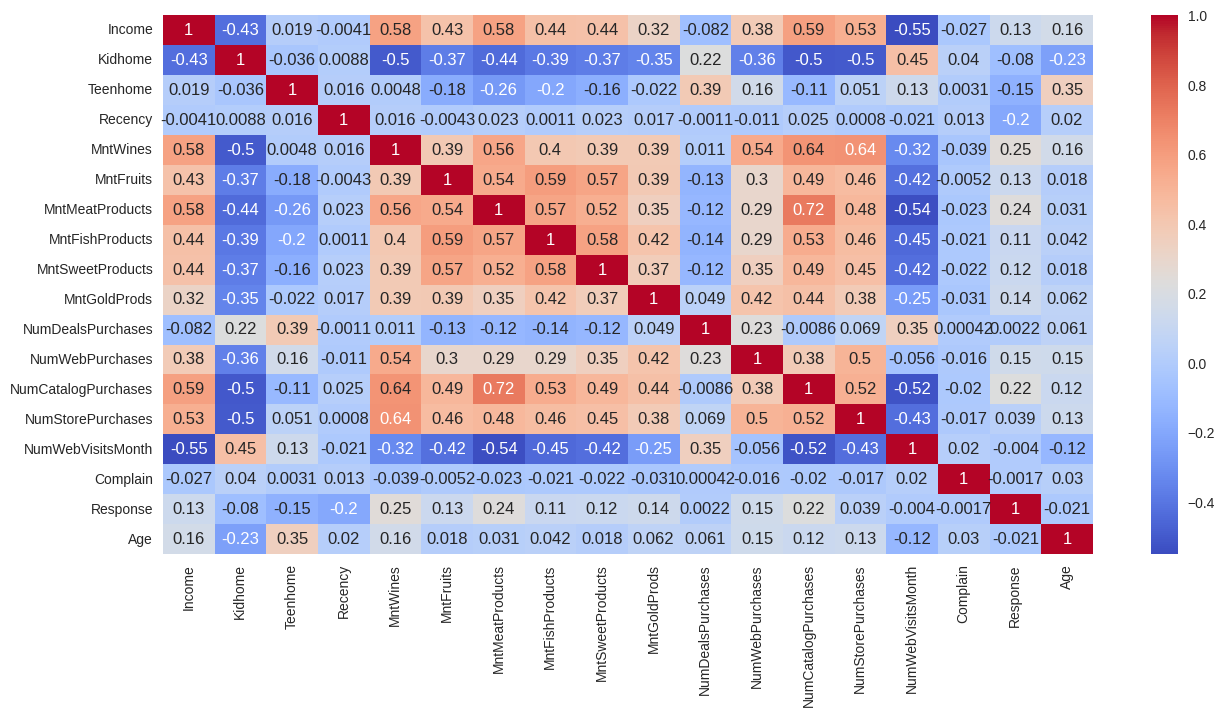

In [19]:
# Check for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

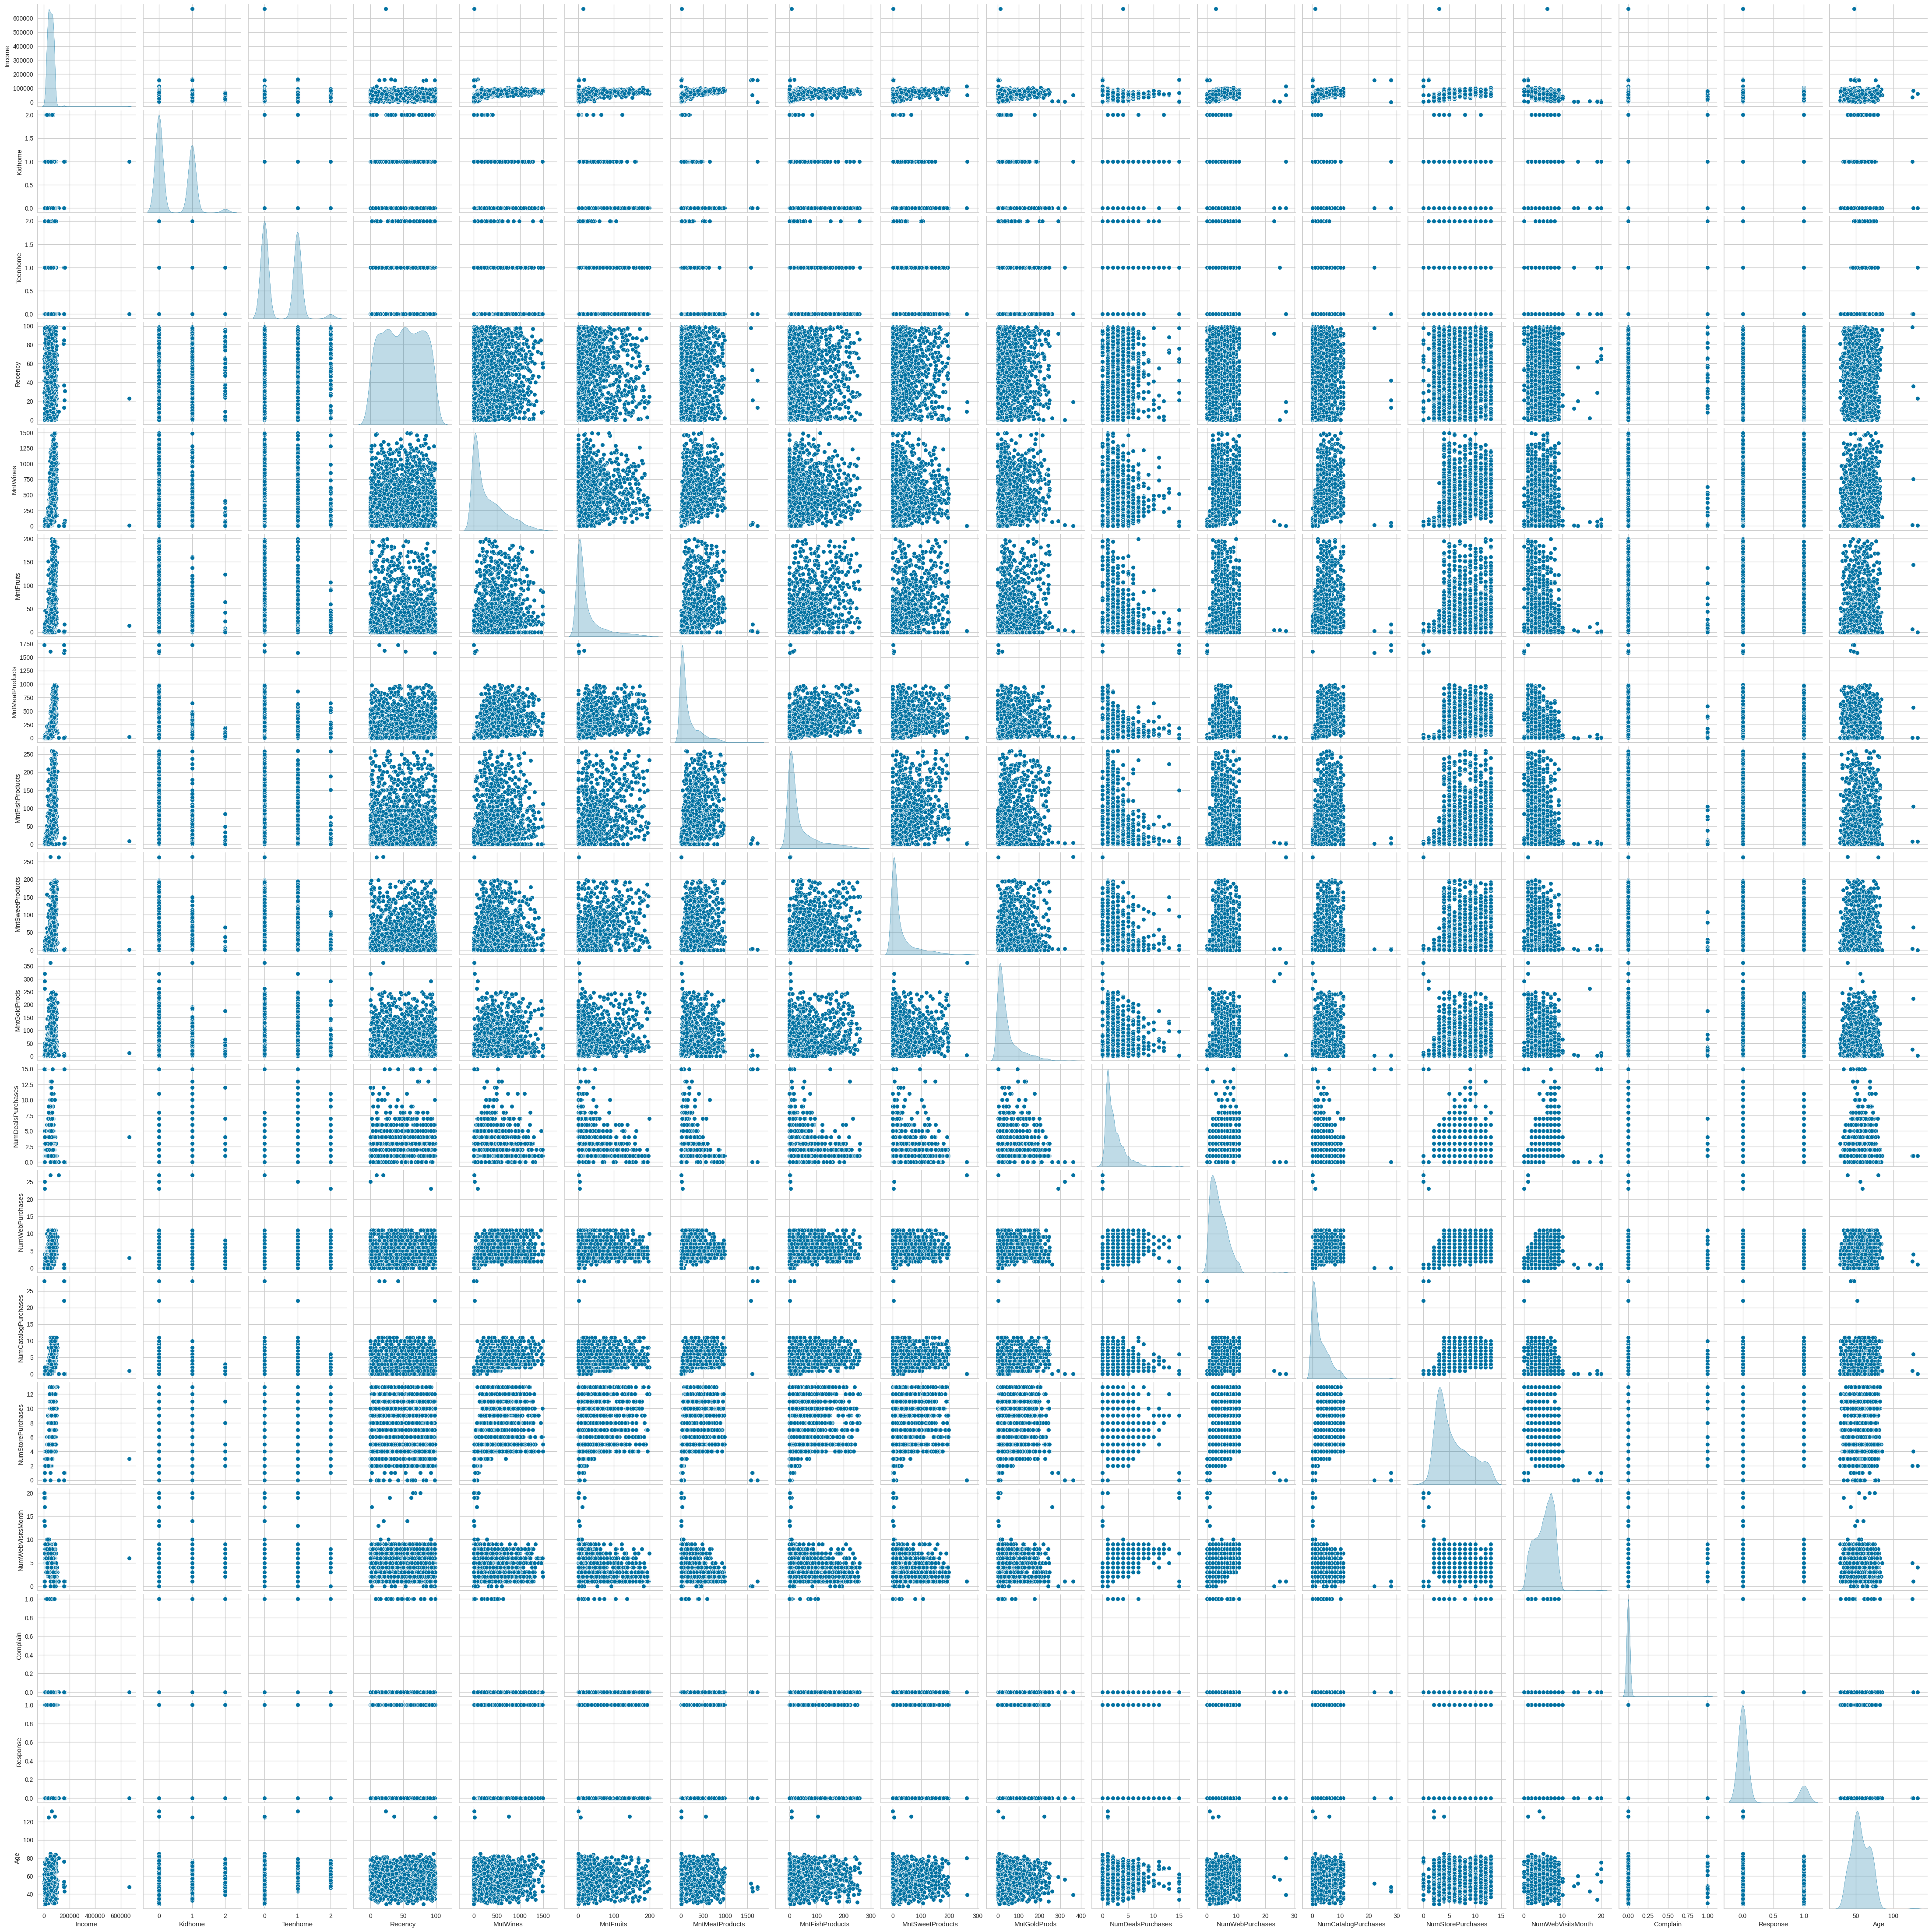

In [20]:
# Check for pairplots
sns.pairplot(data=data, diag_kind="kde")
plt.show()

##### **Observations:** The correlation heatmap reveals strong positive relationships among variables such as `MntWines`, `MntMeatProducts` and `MntGoldProds`, indicating that high spenders tend to spend in multiple categories. There are also moderate positive correlations between different purchasing channels. The pairplots visually confirm these trends, showing dense clusters for high spenders.

Outlier detection

In [64]:
# Selection of original numeric variables
numeric_data = data.select_dtypes(include='number')

# Z-score calculation and outliers detection
z_scores = np.abs(zscore(numeric_data))
outliers = (z_scores > 3).any(axis=1)

print(f"Number of detected outliers using Z-score method: {outliers.sum()}")

Number of detected outliers using Z-score method: 282


Observations: Outliers are detected with the Z-score method. I decided not to remove them, because they represent extreme but potentially relevant behaviors, and do not compromise the quality of clustering.

Data pre-processing: scaling

In [65]:
# Creating a copy of the original data
k_means_data = data.copy()

# Standardizing the numerical features and scaling the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(k_means_data)

# Creating a dataframe of the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=k_means_data.columns)

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 2 	WCSS: 29497.59180741321
Number of Clusters: 3 	WCSS: 26230.807971388716
Number of Clusters: 4 	WCSS: 24835.86779461125
Number of Clusters: 5 	WCSS: 22712.065378166288
Number of Clusters: 6 	WCSS: 21683.006732992202
Number of Clusters: 7 	WCSS: 20721.29101573217
Number of Clusters: 8 	WCSS: 19867.13268970371
Number of Clusters: 9 	WCSS: 19394.819190201433
Number of Clusters: 10 	WCSS: 18860.74162517017


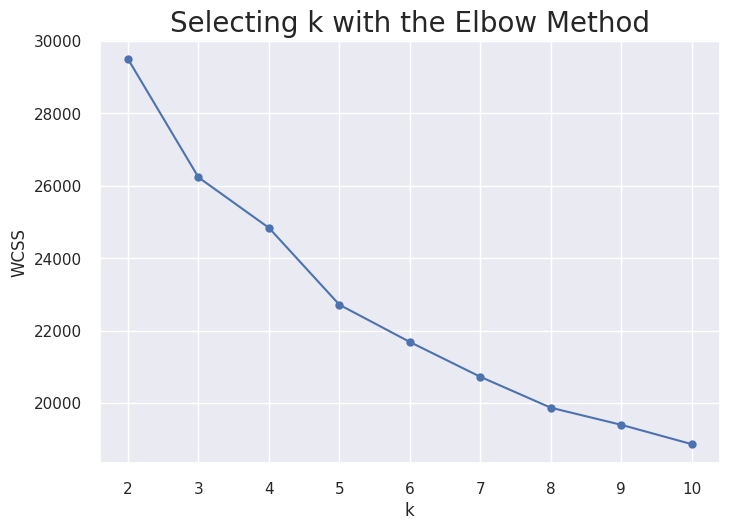

In [66]:
clusters = range(2, 11)
wcss_k8 = []

# Initializing the kmeans model
for k in clusters:
    model = KMeans(n_clusters=k, random_state=0)
    # Fitting the kmeans model on the scaled data
    model.fit(scaled_df)
    wcss = model.inertia_
    wcss_k8.append(wcss)

    print("Number of Clusters:", k, "\tWCSS:", wcss)

plt.plot(clusters, wcss_k8, "bx-", marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

##### **Observations:** The optimal number of clusters appears to be 4, because this is the point at which the rate of decrease in WCSS begins to flatten. I believe that, beyond this value, adding more clusters shall provide minimal benefit.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [67]:
sil_score = []
cluster_list = range(2, 11)

# Initializing the kmeans model
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    # Fitting the kmeans model
    preds = clusterer.fit_predict(scaled_df)
    # Checking the silhouette score against the predictions
    score = silhouette_score(scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.28417340291067655
For n_clusters = 3, the silhouette score is 0.21157332525513017
For n_clusters = 4, the silhouette score is 0.14392835398979065
For n_clusters = 5, the silhouette score is 0.1507865356301614
For n_clusters = 6, the silhouette score is 0.14593106430611189
For n_clusters = 7, the silhouette score is 0.1483993804513877
For n_clusters = 8, the silhouette score is 0.15445670830945524
For n_clusters = 9, the silhouette score is 0.15201513952801726
For n_clusters = 10, the silhouette score is 0.16112726430616614


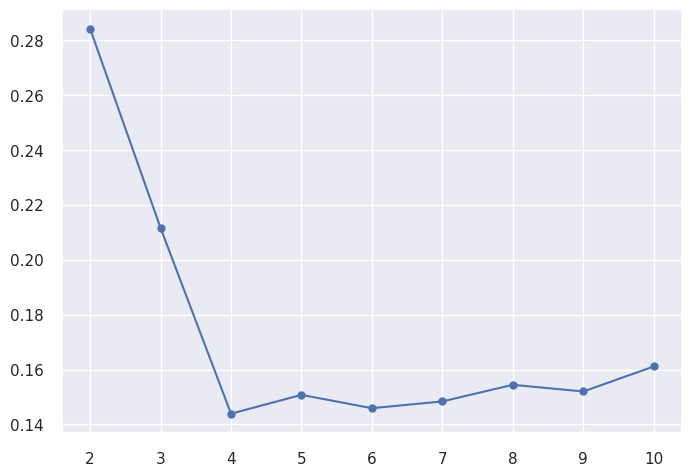

In [68]:
plt.plot(cluster_list, sil_score, marker = 'o')
plt.show()

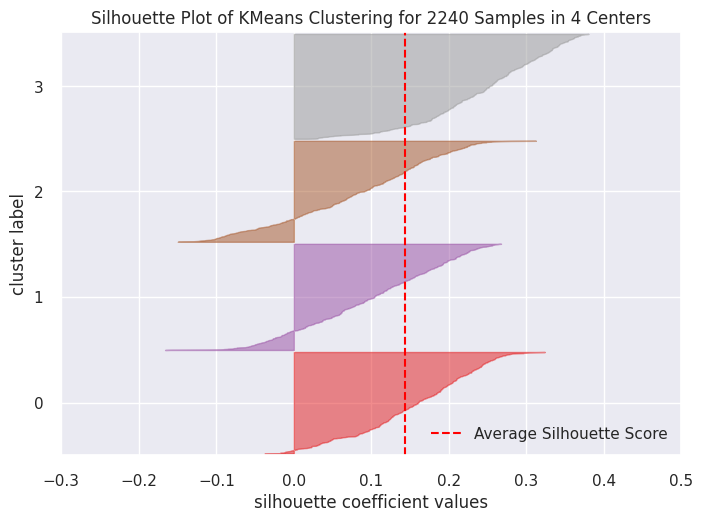

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
# Create the model with k=4
model = KMeans(n_clusters=4, random_state=0)

# Fit the silhouette visualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)
visualizer.show()

##### **Observations:** While the elbow plot suggests that 4 clusters is a good choice, the silhouette score plot shows the highest score at k=2, but the score remains relatively stable from k=4 onward. To better evaluate the quality of the clustering at k=4, I generated a silhouette diagram. This second plot shows that, although the average silhouette score is moderate (~0.15), most data points in all four clusters have positive silhouette values, indicating that the clusters are relatively well-defined and separable. Although the highest silhouette score is at k=2, this may provide limited segmentation for business decisions. Therefore, k = 4 seems a reasonable trade-off between interpretability and business utility, supported by both the elbow plot and the silhouette analysis.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [70]:
%%time

# Initializing kmeans model
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_df)

CPU times: user 9.67 ms, sys: 0 ns, total: 9.67 ms
Wall time: 9.26 ms


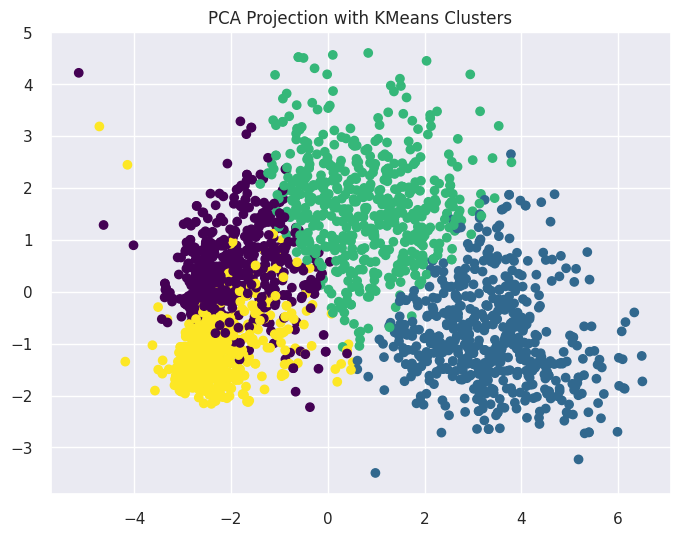

In [71]:
# Perform PCA to reduce the data to 2 principal components
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_df)

# Create a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=cluster_labels, cmap='viridis')
plt.title("PCA Projection with KMeans Clusters")
plt.show()

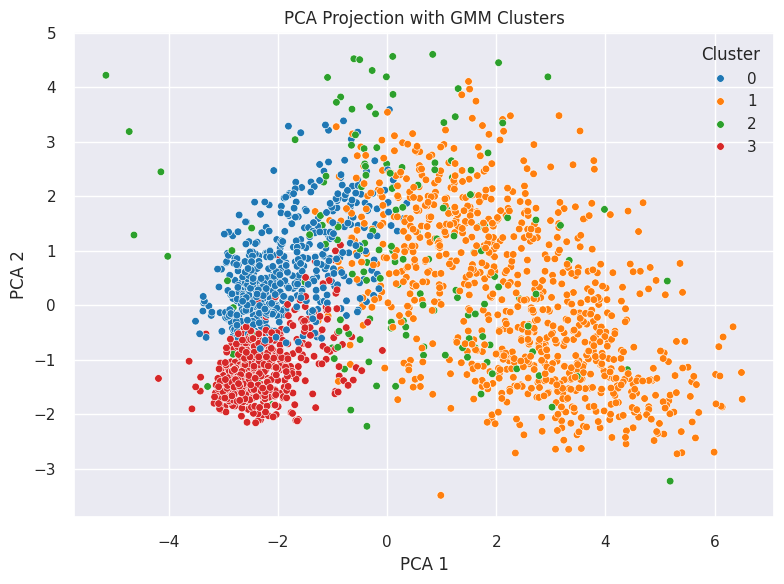

In [72]:
# Fit GMM (assuming 4 clusters for consistency with kmeans)
gmm = GaussianMixture(n_components=4, random_state=0)
gmm_labels = gmm.fit_predict(scaled_df)

# PCA projection
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced[:, 0],
    y=reduced[:, 1],
    hue=gmm_labels,
    palette="tab10",
    legend="full",
    s=30
)
plt.title("PCA Projection with GMM Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# Fit kmeans model with k=4 and get cluster labels
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Fit GMM with k=4 and get cluster labels
gmm = GaussianMixture(n_components=4, random_state=0)
gmm_labels = gmm.fit_predict(scaled_df)

# Compute silhouette scores for both
kmeans_score = silhouette_score(scaled_df, kmeans_labels)
gmm_score = silhouette_score(scaled_df, gmm_labels)

# Print silhouette score comparison
print("Silhouette Score Comparison")
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")
print(f"GMM Silhouette Score:     {gmm_score:.4f}")

Silhouette Score Comparison
K-Means Silhouette Score: 0.1439
GMM Silhouette Score:     0.1244


##### **Observations:** The model is fitted with k=4 clusters. The fitting process is very fast, taking approximately 30.7 milliseconds of wall time. Both K-Means and GMM perform well at k=4, reinforcing the idea that 4 clusters provide meaningful segmentation. Although K-Means achieves a slightly higher silhouette score (0.1439 vs. 0.1244) and is therefore preferable, the utility of GMM lies in providing smoother and more probabilistic transitions between clusters. Anyway, the agreement between the two methods supports the robustness of using four clusters for this analysis.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [74]:
# Creating a copy of the original data
clusterdataset = data.copy()

# Adding cluster labels to the scaled dataframes
clusterdataset["K_means_segments"] = cluster_labels

# Customer count per cluster
clusterdataset["K_means_segments"].value_counts().sort_index()

K_means_segments
0    550
1    575
2    547
3    568
Name: count, dtype: int64

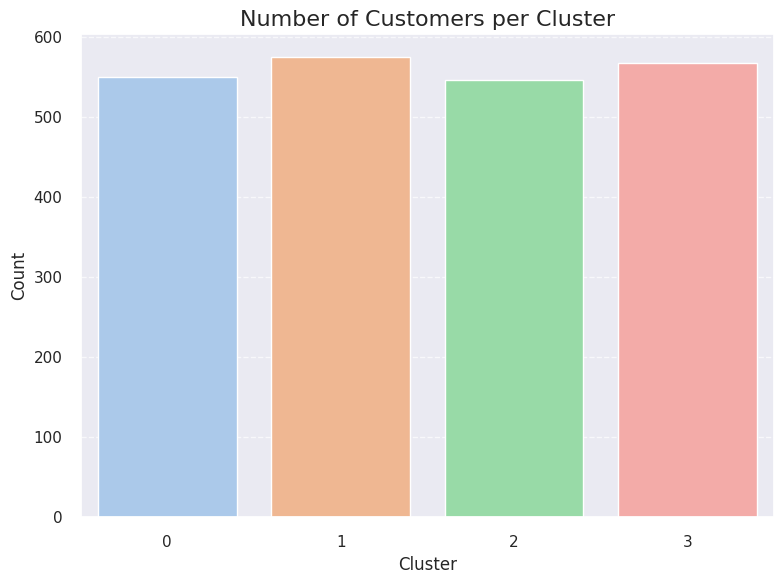

In [75]:
# Visualizing the number of customers in each kmeans cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=clusterdataset, x="K_means_segments", palette="pastel")

plt.title("Number of Customers per Cluster", fontsize=16)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

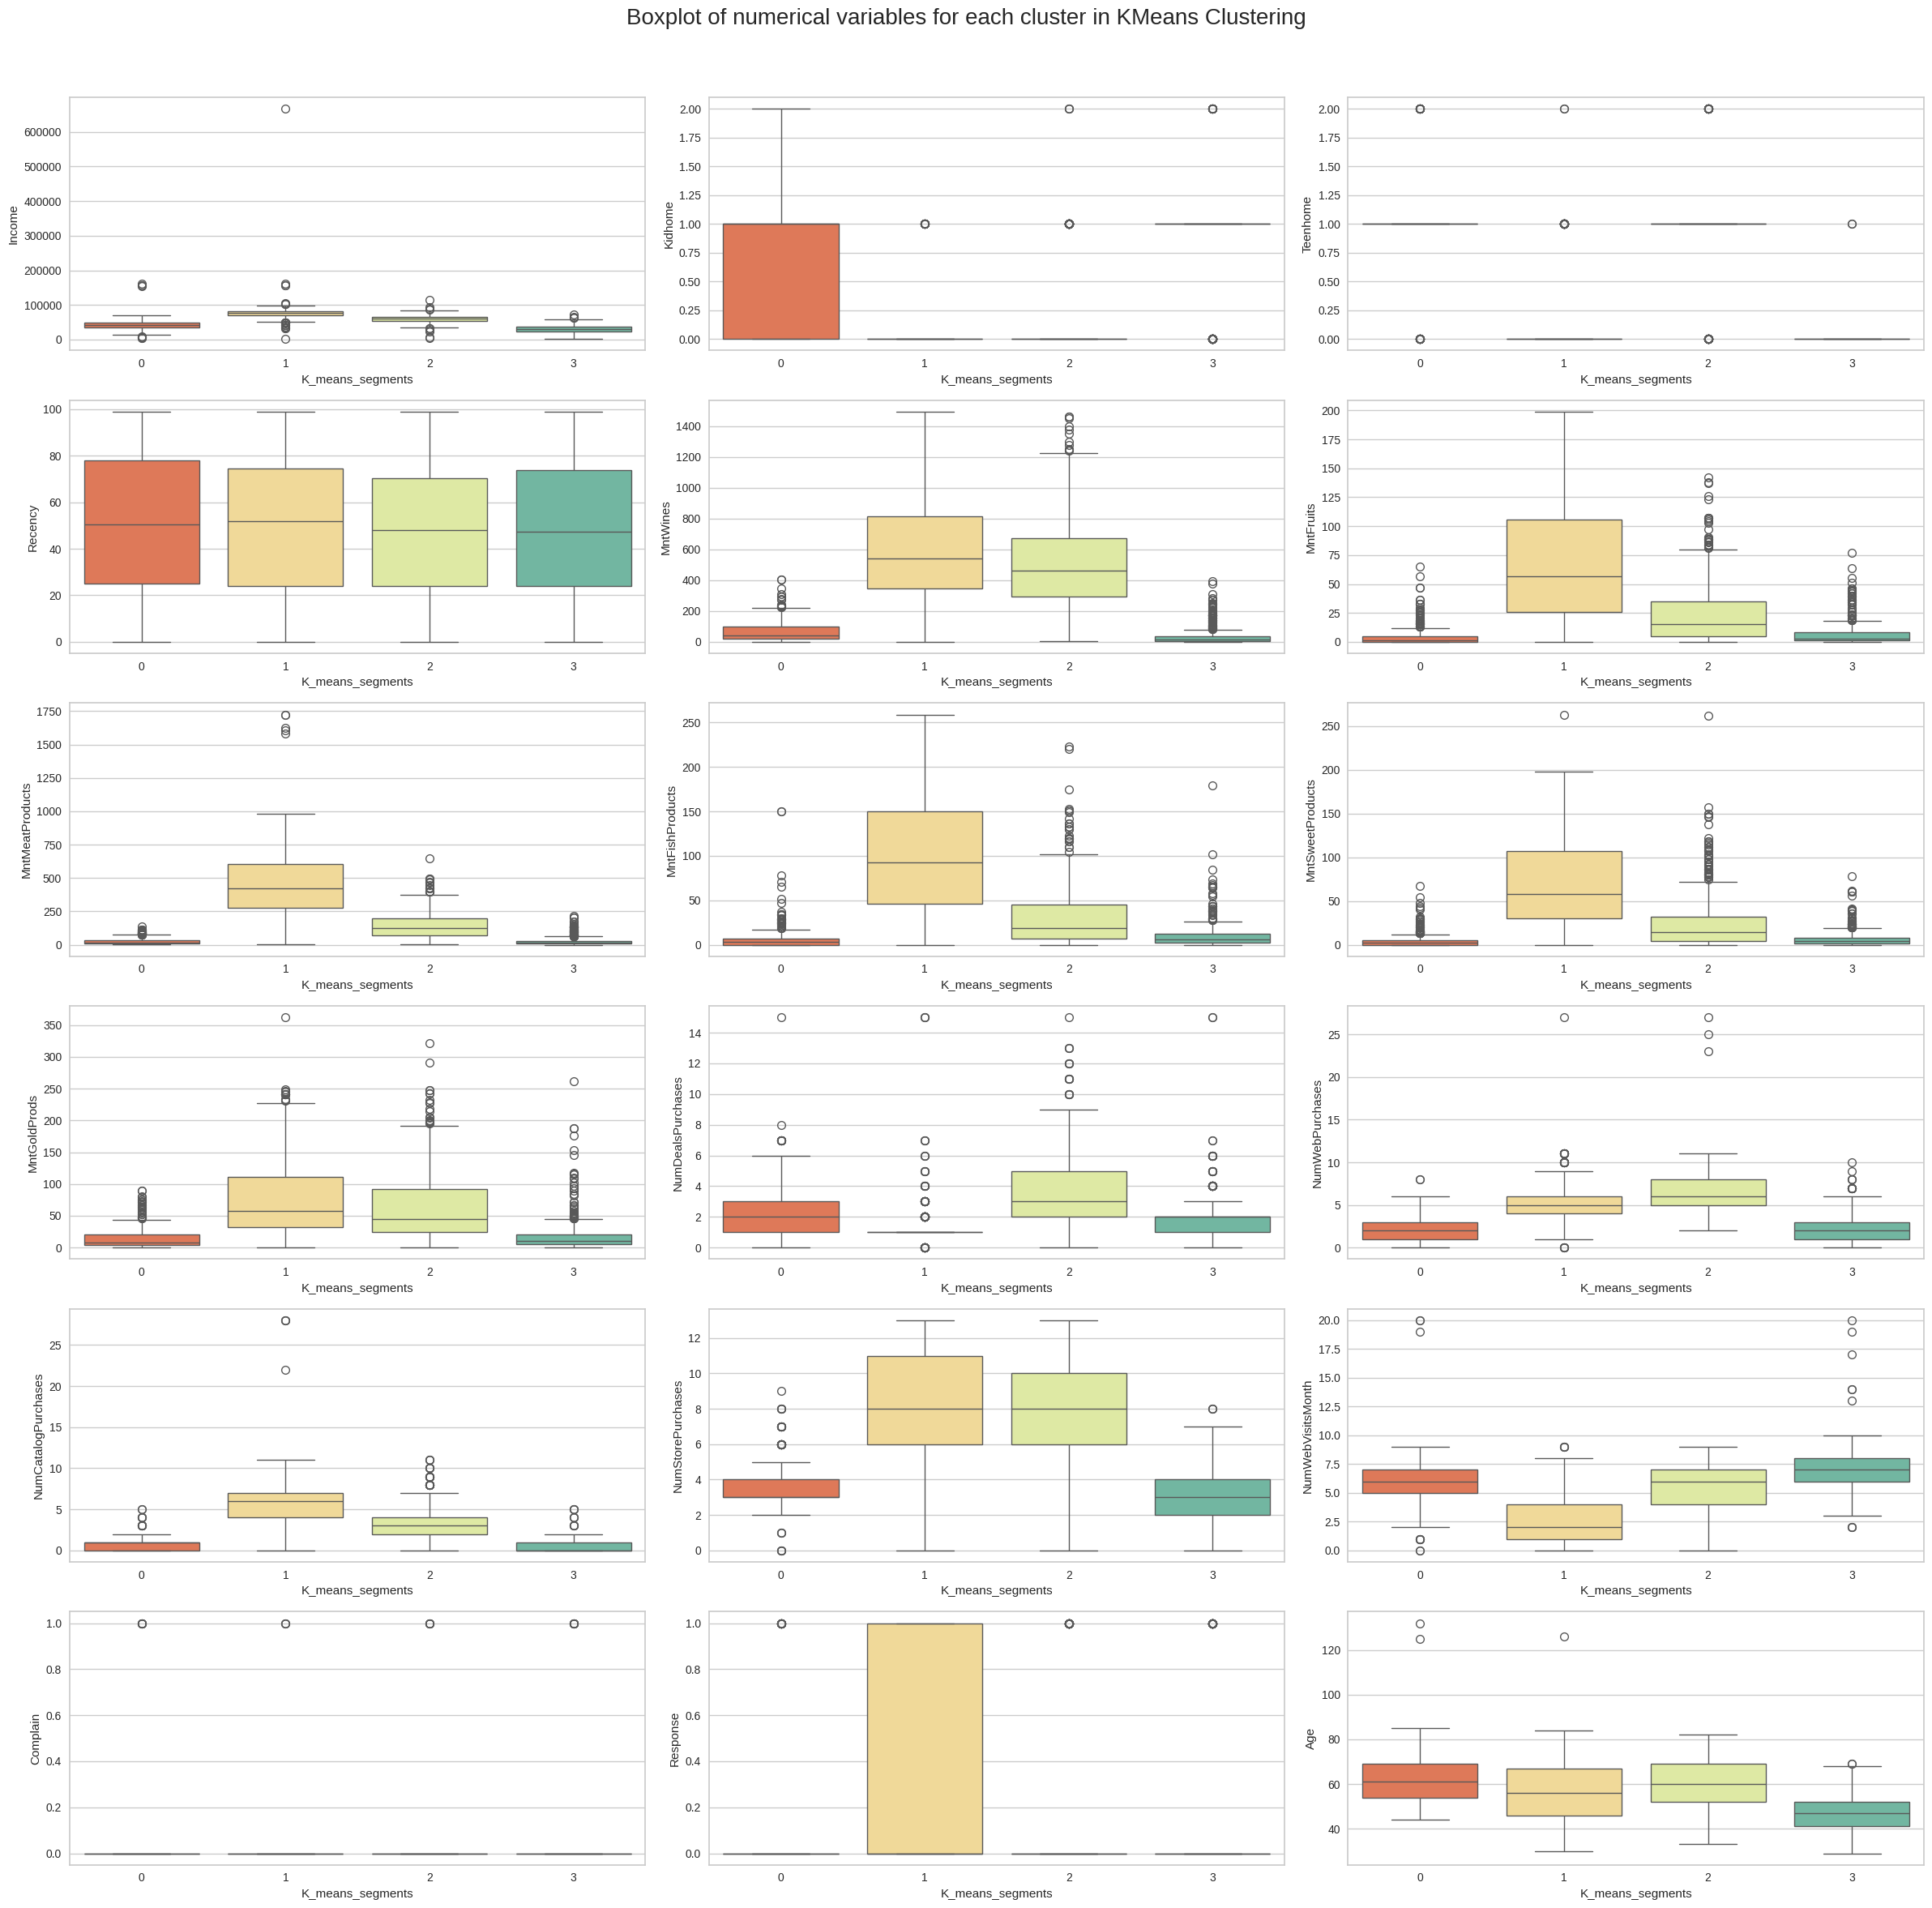

In [33]:
# Set the figure size for the plot and the main title
plt.figure(figsize=(24, 24))
plt.suptitle("Boxplot of numerical variables for each cluster in KMeans Clustering", fontsize=20)

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(clusterdataset.columns.to_list()[:-1]):
    # Create subplots in a 6x3 grid
    plt.subplot(6, 3, i + 1)
    sns.boxplot(data=clusterdataset, x="K_means_segments", y=variable, palette='Spectral')

# Adjust layout to make space for title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### **Observations:** The clusters have different patterns:
- Cluster 0: Moderate income, low spending, with a high number of deals pruchases. Balanced behavior across channels, and low complaint rate.
- Cluster 1: High income, high spending across all product categories, and strong response to previous campaigns. It seems to be the most valuable customer segment.
- Cluster 2: Medium to high income, medium spending (focused on deals purchases and wine). There's a high engagement with marketing campaigns.
- Cluster 3: Very low income, minimal spending and no positive response to campaigns. This segment is very poorly engaged, except for the number of web visits per month.

The number of customers per cluster is quite balanced, supporting the quality of the segmentation.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

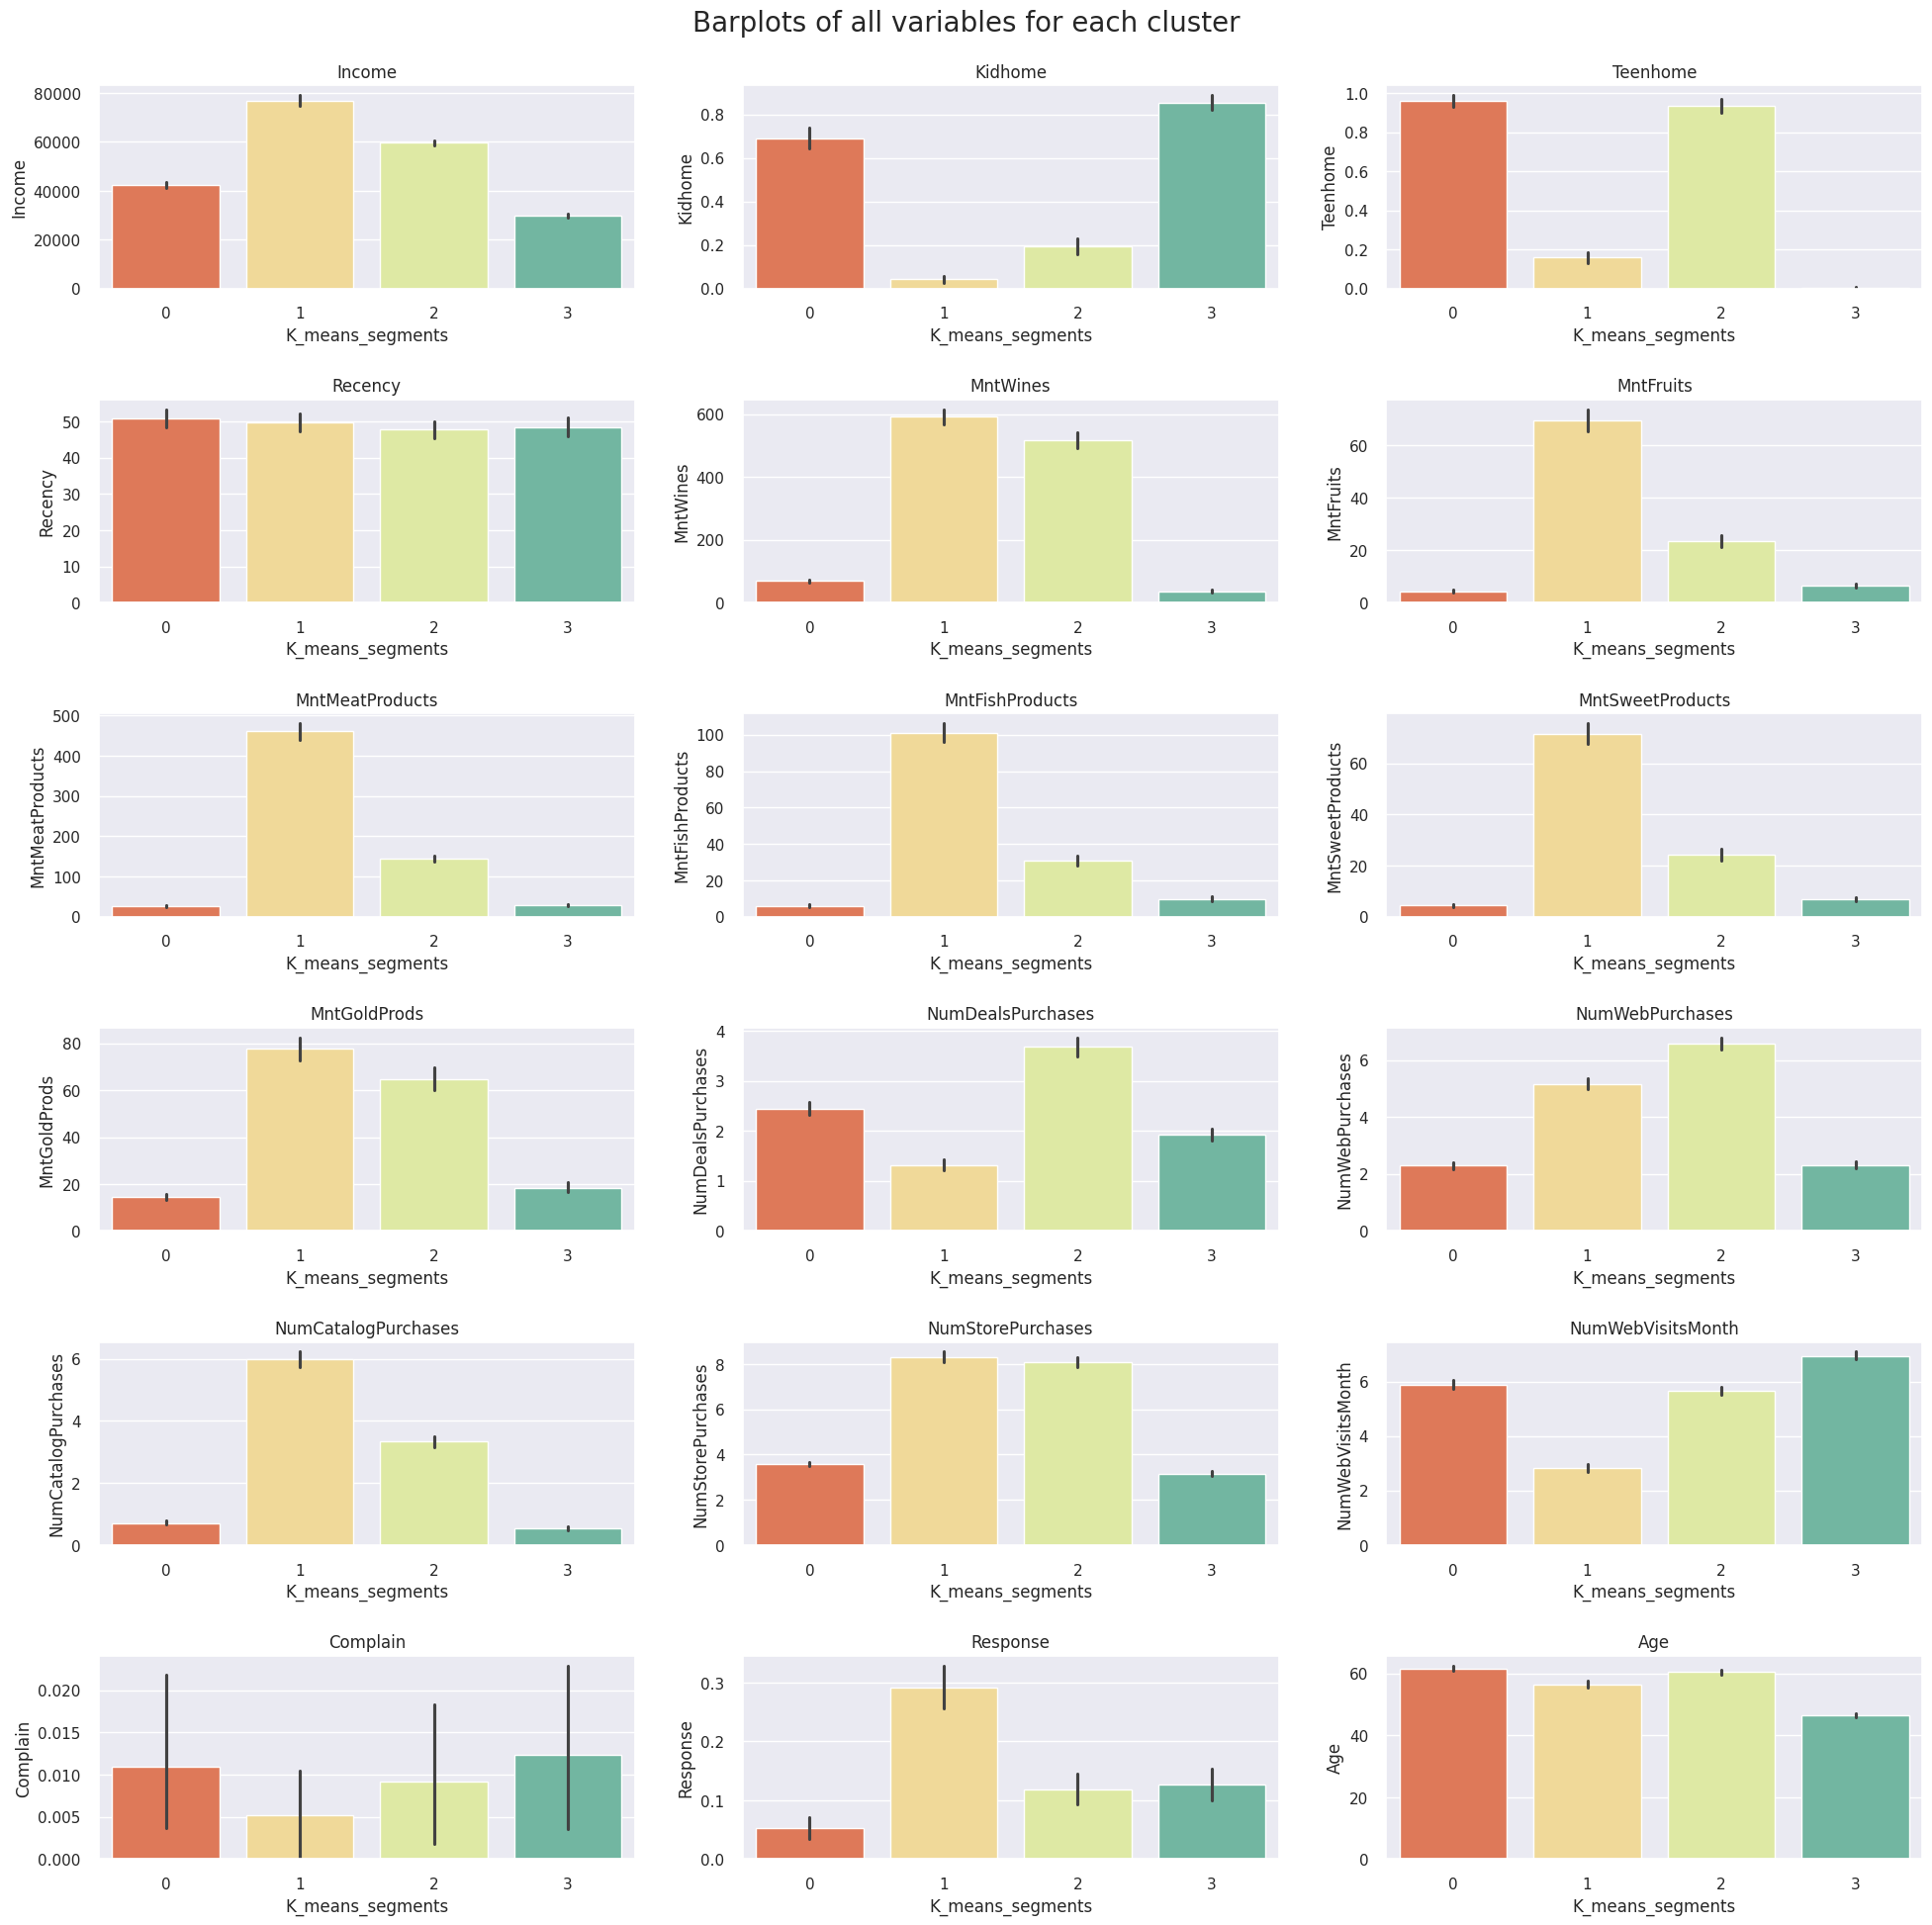

In [76]:
# Plotting barplots of numerical variables for each cluster
# Set the figure size for the plot and the main title
plt.figure(figsize=(20, 20))
plt.suptitle("Barplots of all variables for each cluster", fontsize=20)

for i, variable in enumerate(clusterdataset.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.barplot(data=clusterdataset, x="K_means_segments", y=variable, palette='Spectral')
    plt.title(variable)

plt.tight_layout(pad=2.0)
plt.show()

In [77]:
# Compute the mean of all numerical features grouped by kmeans cluster
cluster_summary = clusterdataset.groupby("K_means_segments").mean(numeric_only=True)

# Display the summary table for cluster profiling
display(cluster_summary)

Income   Kidhome  Teenhome    Recency    MntWines  \
K_means_segments                                                            
0                 42436.047273  0.690909  0.961818  50.658182   68.550909   
1                 76695.117391  0.041739  0.158261  49.646957  591.645217   
2                 59643.780622  0.193784  0.936015  47.773309  516.972578   
3                 29838.729754  0.853873  0.003521  48.352113   35.445423   

                  MntFruits  MntMeatProducts  MntFishProducts  \
K_means_segments                                                
0                  4.249091        25.441818         6.081818   
1                 69.584348       460.306087       101.177391   
2                 23.491773       145.023766        30.970750   
3                  6.547535        28.117958         9.848592   

                  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
K_means_segments                                                      
0                         4.341818     14.507273           2.445455   
1                        71.488696     77.813913           1.314783   
2                        24.292505     64.787934           3.678245   
3                         6.758803     18.394366           1.927817   

                  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
K_means_segments                                                            
0                        2.296364             0.710909           3.580000   
1                        5.166957             5.996522           8.321739   
2                        6.583181             3.329068           8.082267   
3                        2.315141             0.533451           3.160211   

                  NumWebVisitsMonth  Complain  Response        Age  
K_means_segments                                                    
0                          5.894545  0.010909  0.052727  61.676364  
1                          2.826087  0.005217  0.292174  56.493913  
2                          5.654479  0.009141  0.118830  60.425960  
3                          6.952465  0.012324  0.126761  46.507042

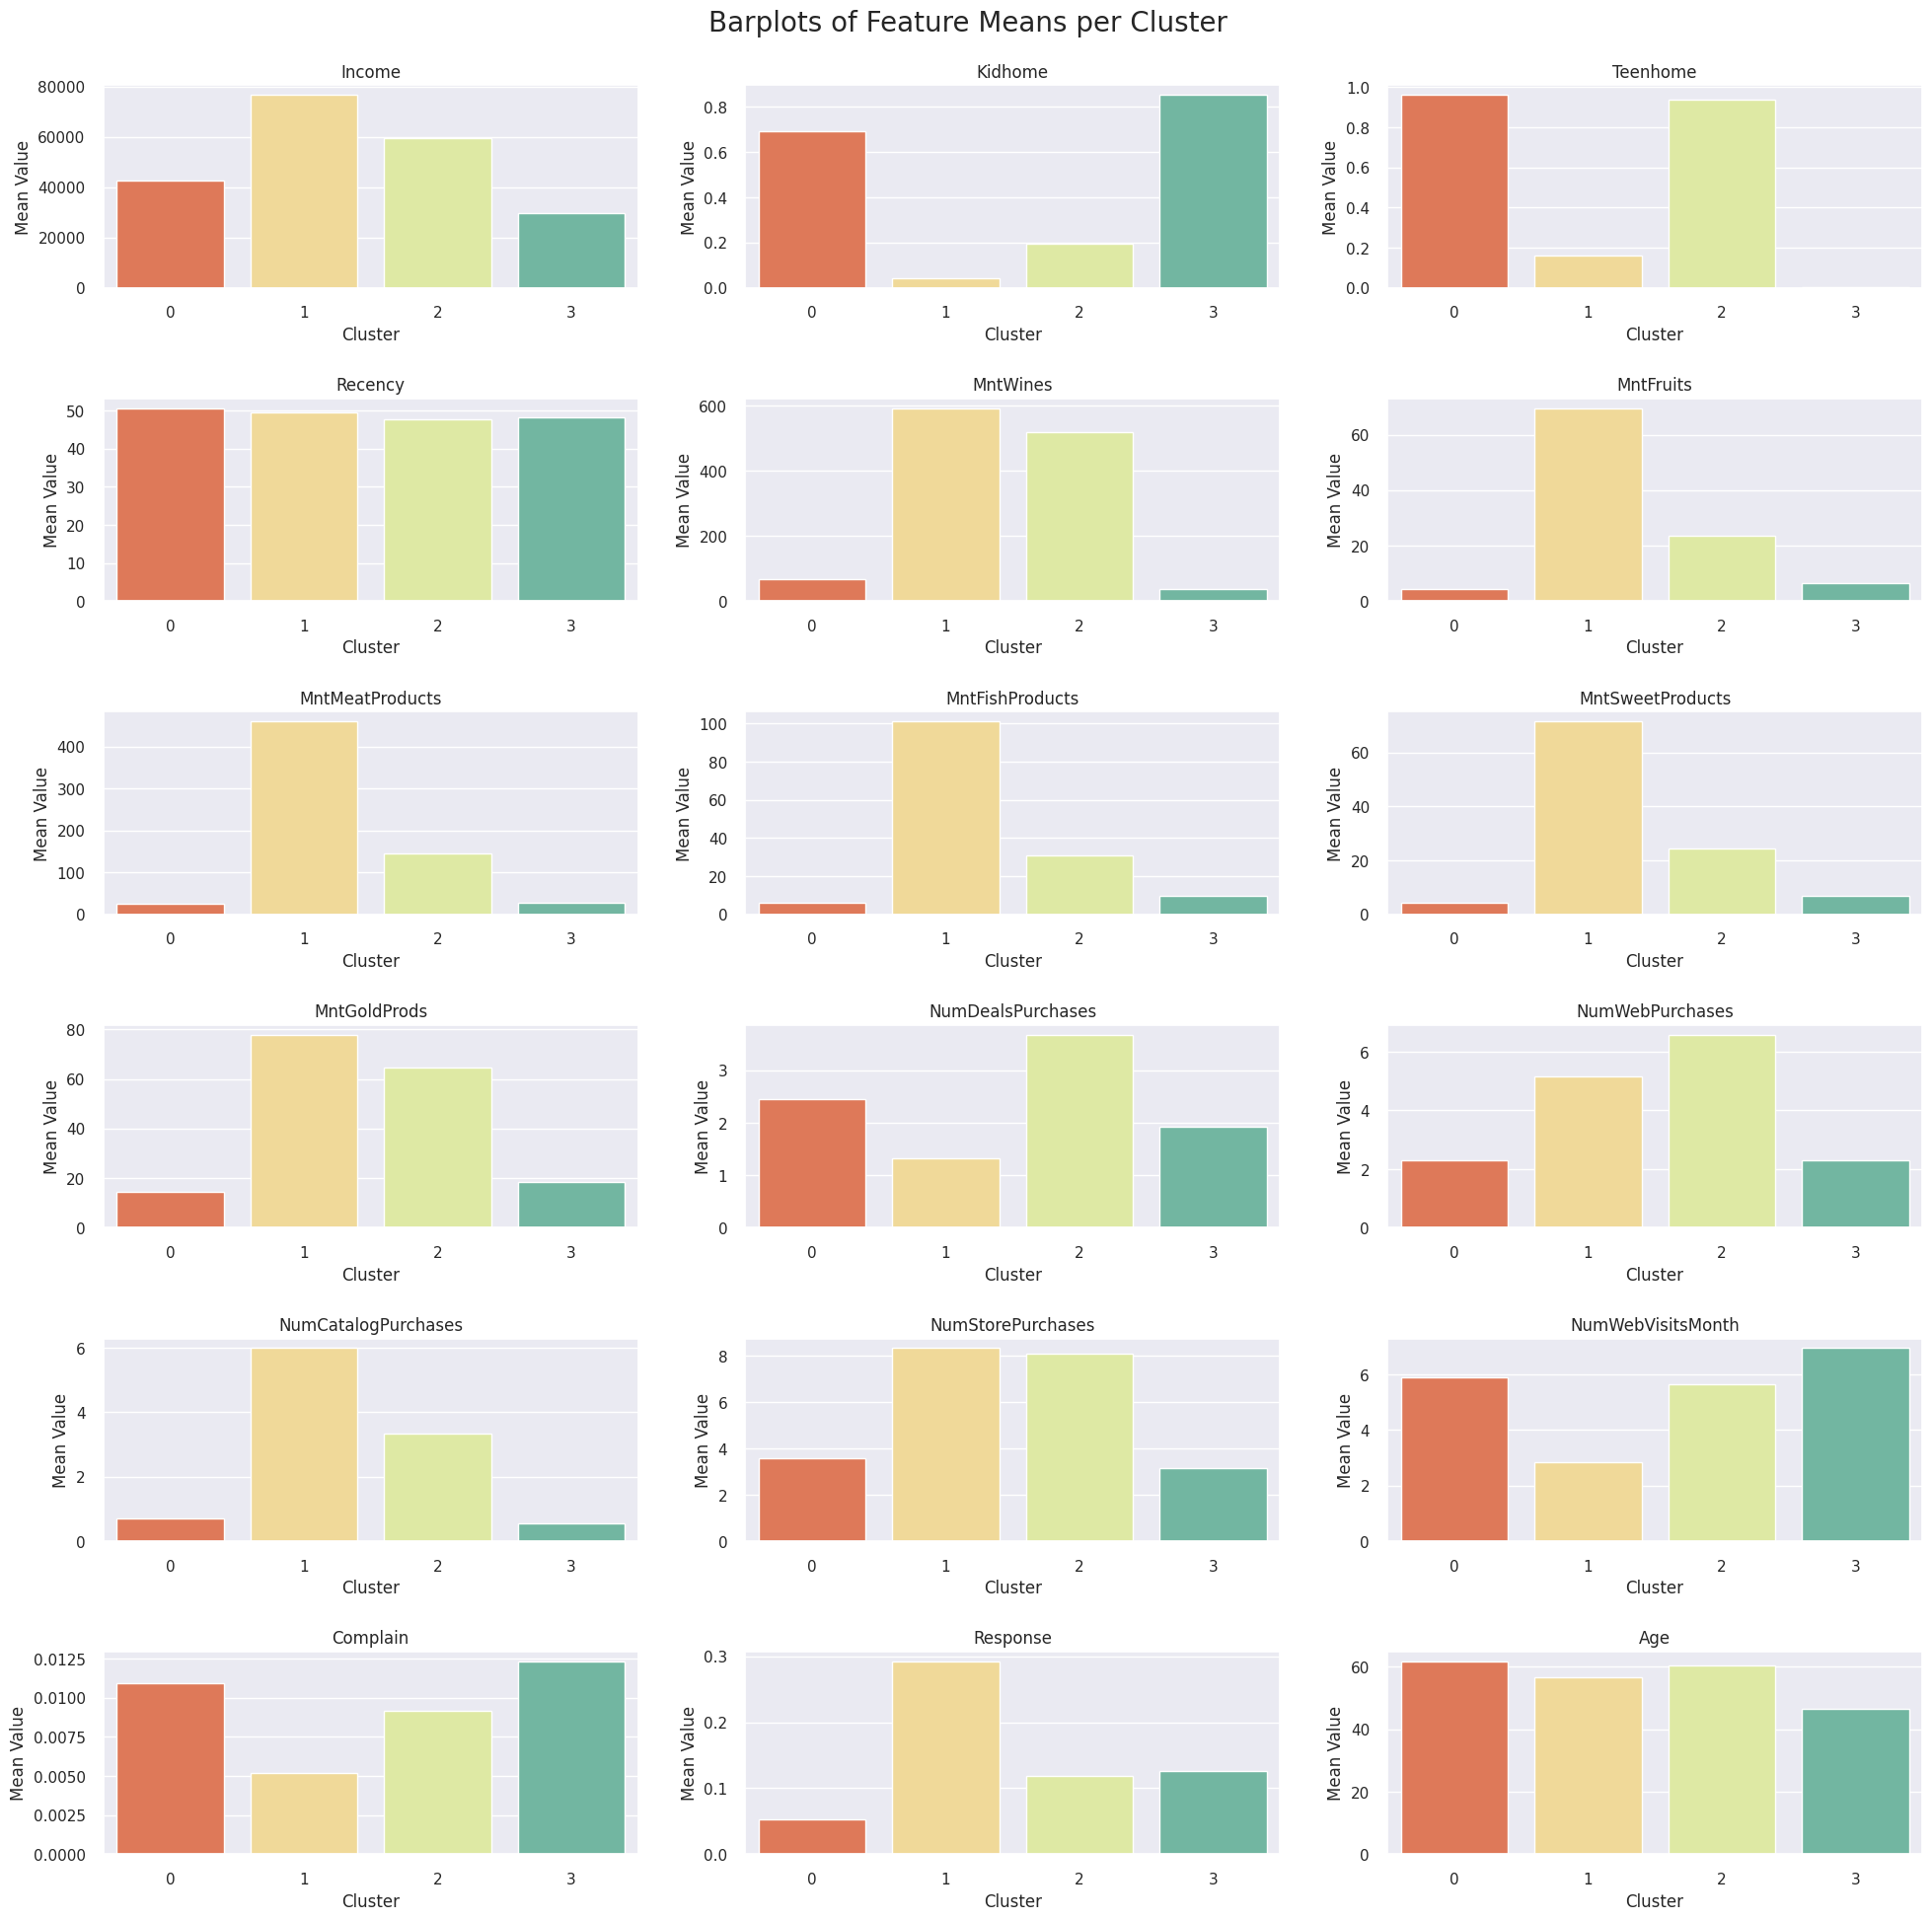

In [78]:
# Create barplots for each numerical variable in order to compare cluster means
plt.figure(figsize=(20, 20))
plt.suptitle("Barplots of Feature Means per Cluster", fontsize=20)

for i, column in enumerate(cluster_summary.columns):
    plt.subplot(6, 3, i + 1)
    sns.barplot(x=cluster_summary.index, y=cluster_summary[column], palette="Spectral")
    plt.title(column)
    plt.xlabel("Cluster")
    plt.ylabel("Mean Value")

plt.tight_layout(pad=2.0)
plt.show()

##### **Observations:** The cluster profile using barplots shows some differences between the segments:

- Cluster 0: older families that show medium income (around 42K) and balanced behavior in all variables. They have the highest average age (around 61.7 years) and a high number of kids and teens at home. Low spending across product categories. This cluster also presens a low campaign responsiveness.
- Cluster 1: is characterized by the highest income (around 77k) and the highest spending in categories such as wine, meat, fish and gold products. Very few kids or teens. It also shows a high number of catalog and in-store purchases, with the highest campaign response rate. It represents highly engaged and high value customers.
- Cluster 2: middle-to-high income (around 59K). Older customers (around 60 years), with a low presence of kids. With a strong presence in web and store channels, it shows high engagement with marketing campaigns and a high response. These customers are responsive to deals and could be converted to higher-value customers with targeted offers. High spending on wine and gold.
- Cluster 3: has the lowest income (around 29k) and spending, with below average scores almost everywhere. It represents the younger customers (around 46 years) with a high number of children. Here, campaign responses, store and catalog engagement are low, while the number of web visits per month are very high. The deals purchases are high as well. This one represents a low-value segment.

The bar charts and cluster averages confirm that K-Means has successfully captured the behavioral diversity of the customer base. Each cluster has a distinct and actionable profile.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

Based on the cluster insights, the following business recommendations can be made:

- **1) High-value cluster**: These customers have the highest income and spending, with strong engagement in in-store and catalog channels and high campaign responsiveness. To ensure their continued engagement and long-term value, they should be retained through personalized loyalty programs, exclusive offers, and premium services.

- **2) Sensitive to promotions (with potential for growth)**: These are older customers with good income and moderate spending habits. They have shown a favorable response to marketing campaigns and are active on both online and physical storefront channels. Promotions targeted at this segment, limited-time deals, and cross-selling strategies could potentially increase their value.

- **0) Older families with low-to-medium value**: While this group has a medium income and balanced behavior, their spending is low. To enhance their engagement, it would be advisable to offer customized family-oriented product bundles or seasonal discounts.

- **3) Younger, low-income, digitally active**: This group demonstrates high web activity and frequent deal purchases, but low spending and low campaign responsiveness. It is recommended that businesses focus on automated, cost-effective digital marketing strategies and optimize their websites for quick, low-cost conversions.